# numpyだけで構築　Deep Q-NetworkでCartPole

### フレームワークを使用せず、numpyだけでDeep Q-Networkを構築しました。CartPole問題を解いています。<br><BR>Multi-step LearningとHuber損失を組み込んでいます。<BR><br>このノートブックでは、実際にモデルを動かしてみることができます。

このデモ用ノートブックを動かす場合、以下の物が必要です。<br>
- モデル本体（同じフォルダにあるCartPole.py）<br>
- 同じフォルダにある「common」フォルダ
- 同じフォルダにある「demo_model_params」フォルダ
- （必要ならば）OpenAI Gym　のインストール（このノートブックにインストールのコードセルがあり、その実行でもOK）

### OpenAI Gym　のインストール　（必要な場合だけ）

In [ ]:
!pip install gym

### 必要なパッケージ等のインポート

In [1]:
import matplotlib.pyplot as plt
import gym
import time
import numpy as np

### モデル本体のインポート

In [2]:
#モデルのインポート
from CartPole import Planner #モデル本体。同じフォルダのCartPole.py。

### CartPole環境の活性化

In [3]:
env = gym.make("CartPole-v0")
state_dim = env.observation_space.shape[0]
print("state_dim:", state_dim)
action_dim = env.action_space.n
print("action_dim:", action_dim)

state_dim: 4
action_dim: 2


### CartPoleをPlayするメソッドを定義

このノートブック上で何度か使うので、ここで定義します。<br>注意！Google ColaboratoryのようなGUI描画ウィンドウが無い実行環境では、このままでは実行できません。実行する方法はWeb上の情報を参照してください。

In [4]:
#CartPoleをPlayするメソッド

def play_cart_pole(planner):

    #動かす
    max_steps = 200 #CartPOleの仕様で、そもそも200stepで強制終了される。

    curr_st=None
    next_st=None
    done=False

    try:

        curr_st = env.reset()
        env.render(mode='human')
        time.sleep(5)

        for st in range(max_steps):

            print("st:", st)
            
            #動きが速くてよく分からない場合があるので、ステップ間でちょっとだけsleep。
            time.sleep(0.075)
            
            #モデルインスタンスが最適な行動を推測
            action_predicted = planner.predict_best_action(curr_st) 
            #その行動を環境に指示
            next_st, _, done, _ = env.step(action_predicted)

            #レンダリング（注意！Google ColaboratoryのようなGUI描画ウィンドウが無い実行環境では、このままでは実行できません。）
            env.render(mode='human')

            if done==True:
                #エピソード終了
                #200ステップに達した（CartPole環境自体が強制終了する）か、倒れてしまったか
                print("done " + str(st+1) + "steps" )
                break

            curr_st = next_st

    finally:
        env.close()

### 訓練済モデルにCartPoleをPlayさせる

まず最初に、未訓練のモデルインスタンスを生成しPlayさせ、ダメダメ感を認識した後、<br>
訓練済パラメーターをこのモデルインスタンスに読み込み、Playさせます。CartPole仕様上の上限200ステップ程度まで粘るはずです。

In [6]:
#訓練済モデルにCartPoleをPlayさせる

#まずはモデルのインスタンスを生成
p_demo = Planner(name="model_demo", env=env, state_dim=state_dim, action_dim=action_dim, exp_buffer_size=10000) 

#この状態ではまだ未訓練。
#Playさせる。
print("未訓練\n")
play_cart_pole(p_demo)

#訓練済パラメーターを、このモデルインスタンスに読み込む。
file_path_param = "./demo_model_params/for_demo_params_already_trained.pickle"
p_demo.overwrite_params_in_file(file_path=file_path_param)

#このモデルインスタンスは訓練済の状態になった。
#Playさせる。
print("\n訓練済")
play_cart_pole(p_demo)


未訓練

st: 0
st: 1
st: 2
st: 3
st: 4
st: 5
st: 6
st: 7
st: 8
st: 9
done 10steps

訓練済
st: 0
st: 1
st: 2
st: 3
st: 4
st: 5
st: 6
st: 7
st: 8
st: 9
st: 10
st: 11
st: 12
st: 13
st: 14
st: 15
st: 16
st: 17
st: 18
st: 19
st: 20
st: 21
st: 22
st: 23
st: 24
st: 25
st: 26
st: 27
st: 28
st: 29
st: 30
st: 31
st: 32
st: 33
st: 34
st: 35
st: 36
st: 37
st: 38
st: 39
st: 40
st: 41
st: 42
st: 43
st: 44
st: 45
st: 46
st: 47
st: 48
st: 49
st: 50
st: 51
st: 52
st: 53
st: 54
st: 55
st: 56
st: 57
st: 58
st: 59
st: 60
st: 61
st: 62
st: 63
st: 64
st: 65
st: 66
st: 67
st: 68
st: 69
st: 70
st: 71
st: 72
st: 73
st: 74
st: 75
st: 76
st: 77
st: 78
st: 79
st: 80
st: 81
st: 82
st: 83
st: 84
st: 85
st: 86
st: 87
st: 88
st: 89
st: 90
st: 91
st: 92
st: 93
st: 94
st: 95
st: 96
st: 97
st: 98
st: 99
st: 100
st: 101
st: 102
st: 103
st: 104
st: 105
st: 106
st: 107
st: 108
st: 109
st: 110
st: 111
st: 112
st: 113
st: 114
st: 115
st: 116
st: 117
st: 118
st: 119
st: 120
st: 121
st: 122
st: 123
st: 124
st: 125
st: 126
st: 127
st:

### モデルを訓練する

新規にモデルインスタンスを生成し、訓練します。<br>
Multi-step Learningを実装していますので、n=2（2ステップ先のQ値を使用）で訓練することにします。<br>
GPUは全く不要です。そもそもnumpyだけで実装していますので、GPUは無意味ですが。<BR>
※訓練中の訓練過程の出力をしない引数設定にしていますので、このセルの実行では何も表示されません。

In [ ]:
#モデルを訓練

#モデルのインスタンスを生成
p_train = Planner(name="train_demo", env=env, state_dim=state_dim, action_dim=action_dim, exp_buffer_size=10000) 

#インスタンスを訓練
#下記「steps_multi_step_lern=2」が、Muti-step Learningのn=2指定
result = p_train.train(episodes=160, episodes_stop_success=160, episodes_main_params_copy=1, reward_type=0, 
                 steps_per_episode=200, steps_warm_up=10, steps_success_over=160, steps_multi_step_lern=2, 
                 gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay_rate=0.001, batch_size=32, verbose=False) 

#戻り値resultは、訓練時の様々な記録を保持しているDictionaryオブジェクト

### 今の訓練記録をグラフ表示

訓練関数train()は、訓練時の様々な記録を保持しているDictionaryオブジェクト「result」を返します。<br>
「result」内の記録を抽出すれば、エピソード毎の推移グラフなどを描く、などができます。

モデルインスタンス「train_demo」の訓練記録

Multi-step Learningのn=2を指定

エピソード回数：160
内、成功エピソード回数：100
総ステップ回数：24360

<<Main-qnのloss/1エピソード の履歴>>


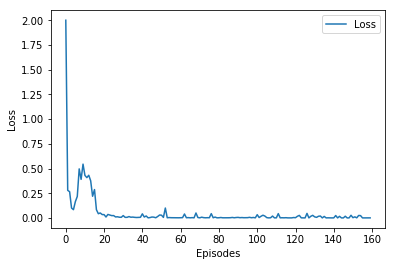


<<ステップ数/1エピソード の履歴（ステップ数が多いほど良い）>>
※200ステップ/エピソード がCartPole仕様上の上限


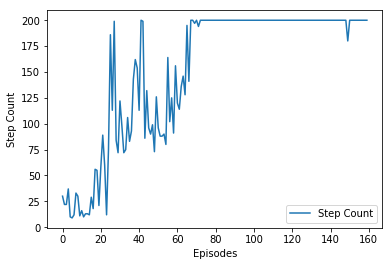

In [24]:
#訓練記録をグラフ表示

#訓練関数train()は、訓練時の様々な記録を保持しているDictionaryオブジェクト「result」を返す。
#訓練時の様々な記録とは、主に、エピソード毎の記録である。
#これらの記録を使用し、種々の情報のグラフを表示する。

name = result["name"]
print("モデルインスタンス「" + name + "」の訓練記録\n")

print("Multi-step Learningのn=" + str(result["steps_multi_step_lern"]) + "を指定\n" )

print("エピソード回数：" + str(result["episode_count"]) ) 
print("内、成功エピソード回数：" + str(result["episode_count_success"]) )
print("総ステップ回数：" + str(result["total_step_count"]) ) 
    
step_count_episodes = result["step_count_episodes"]
loss_episodes = result["loss_episodes"] 
episodes = result["episodes"]  
episodes_arr = np.arange(0, episodes)

    
print("\n<<Main-qnのloss/1エピソード の履歴>>")
plt.plot(episodes_arr, loss_episodes, label="Loss")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Loss")
plt.show()

print("\n<<ステップ数/1エピソード の履歴（ステップ数が多いほど良い）>>\n※200ステップ/エピソード がCartPole仕様上の上限")
plt.plot(episodes_arr, step_count_episodes, label="Step Count")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Step Count")
plt.show()

### 今訓練したモデルでPlayしてみる

In [21]:
#今訓練したモデルインスタンスでPlay

#Playさせる。
print("\n今訓練したモデルインスタンス")
play_cart_pole(p_train)


今訓練したモデルインスタンス
st: 0
st: 1
st: 2
st: 3
st: 4
st: 5
st: 6
st: 7
st: 8
st: 9
st: 10
st: 11
st: 12
st: 13
st: 14
st: 15
st: 16
st: 17
st: 18
st: 19
st: 20
st: 21
st: 22
st: 23
st: 24
st: 25
st: 26
st: 27
st: 28
st: 29
st: 30
st: 31
st: 32
st: 33
st: 34
st: 35
st: 36
st: 37
st: 38
st: 39
st: 40
st: 41
st: 42
st: 43
st: 44
st: 45
st: 46
st: 47
st: 48
st: 49
st: 50
st: 51
st: 52
st: 53
st: 54
st: 55
st: 56
st: 57
st: 58
st: 59
st: 60
st: 61
st: 62
st: 63
st: 64
st: 65
st: 66
st: 67
st: 68
st: 69
st: 70
st: 71
st: 72
st: 73
st: 74
st: 75
st: 76
st: 77
st: 78
st: 79
st: 80
st: 81
st: 82
st: 83
st: 84
st: 85
st: 86
st: 87
st: 88
st: 89
st: 90
st: 91
st: 92
st: 93
st: 94
st: 95
st: 96
st: 97
st: 98
st: 99
st: 100
st: 101
st: 102
st: 103
st: 104
st: 105
st: 106
st: 107
st: 108
st: 109
st: 110
st: 111
st: 112
st: 113
st: 114
st: 115
st: 116
st: 117
st: 118
st: 119
st: 120
st: 121
st: 122
st: 123
st: 124
st: 125
st: 126
st: 127
st: 128
st: 129
st: 130
st: 131
st: 132
st: 133
st: 134
st: 135
st: 13

### 今訓練したモデルの訓練済パラメーターを保存

今訓練したモデルインスタンスの訓練済パラメーターを保存します。<br>
具体的には、訓練済パラメーターのpickleファイルを生成し、保存をします。<br>
この後、別のモデルインスタンスを生成し、保存した訓練済パラメーターのファイルをこのモデルインスタンスに読み込むことができます（冒頭「訓練済モデルにCartPoleをPlayさせる」はこれです）。

In [ ]:
#訓練済パラメータの保存
#訓練済パラメーターを格納するpickleファイルを生成し、保存

#このファイルを置く場所を指定する（必須）
file_dir="./hoge/" #←適宜変更

#このファイルのファイル名を指定する（任意）
#指定無き時はモデルインスタンス名がファイル名に使用される（(name).pickle）
file_name = "hoge.pickle" #←適宜変更するか、引数として指定しない

#訓練済パラメーターが格納されたファイルを保存
p_train.save_params_in_file(file_dir=file_dir, file_name=file_name)